<a href="https://colab.research.google.com/github/juandanieto/Review-of-Neural-Networks/blob/RedNeuronalDesdeCero_varias_Topologias_espiral/RedNeuronalDesdeCero_varias_Topologias_espiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Red Neuronal desde cero usando tres topologías diferentes**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

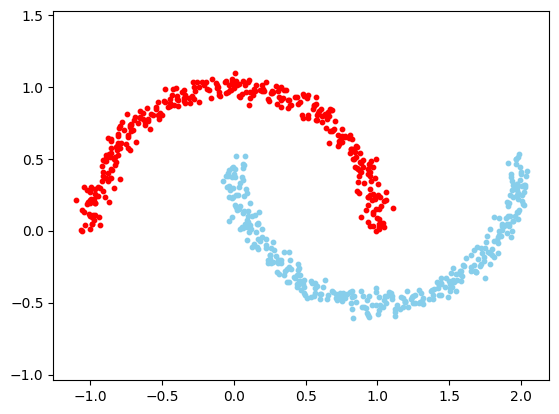

(700, 2)
(700, 1)


In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

n = 700
p = 2

X, y = make_moons(n_samples=n, noise=0.045)
Y = y[:, np.newaxis]

plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c='red', s=10)
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c='skyblue', s=10)
plt.axis('equal')
plt.show()

print(X.shape)  # (500, 2)
print(Y.shape)  # (500, 1)

In [3]:
#Clase para crear capas en la Red Neuronal
class neural_layer():
  def __init__(self, n_con, n_neur, act_fun):
    self.act_fun = act_fun
    self.b = np.random.rand(1, n_neur) * 2 - 1 #Vector
    self.w = np.random.rand(n_con, n_neur) * 2 - 1 #Matriz

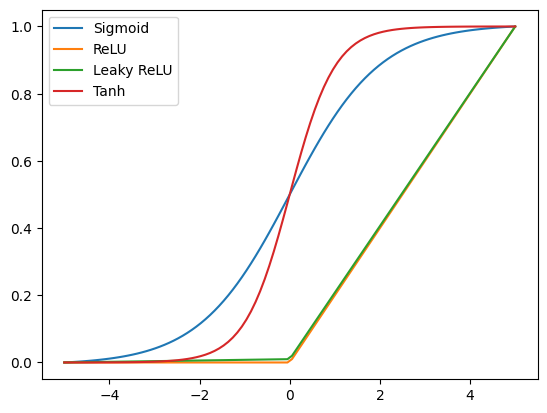

In [4]:
#Funciones de Activación

sigm = (lambda x: 1 / (1 + np.exp(-x)), lambda x: x * (1 - x))
relu = (lambda x: np.maximum(0, x), lambda x: np.where(x > 0, 1, 0))
leaky_relu = (lambda x: np.maximum(0.01 * x, x), lambda x: np.where(x > 0, 1, 0.01))
tanh = (lambda x: np.tanh(x), lambda x: 1 - np.tanh(x)**2)

_x = np.linspace(-5, 5, 100)

# Estandarizando la escala solo para apreciación gráfica de las funciones
sigm_standardized = (sigm[0](_x) - np.min(sigm[0](_x))) / (np.max(sigm[0](_x)) - np.min(sigm[0](_x)))
relu_standardized = (relu[0](_x) - np.min(relu[0](_x))) / (np.max(relu[0](_x)) - np.min(relu[0](_x)))
leaky_relu_standardized = (leaky_relu[0](_x) - np.min(leaky_relu[0](_x))) / (np.max(leaky_relu[0](_x)) - np.min(leaky_relu[0](_x)))
tanh_standardized = (tanh[0](_x) - np.min(tanh[0](_x))) / (np.max(tanh[0](_x)) - np.min(tanh[0](_x)))


plt.plot(_x, sigm_standardized, label='Sigmoid')
plt.plot(_x, relu_standardized, label='ReLU')
plt.plot(_x, leaky_relu_standardized, label='Leaky ReLU')
plt.plot(_x, tanh_standardized, label='Tanh')

plt.legend()
plt.show()

In [5]:
#Creando la estructura base de la Red Neuronal

def create_nn(topology, act_fun):
  nn = [] #Vector donde están las capas de toda la red

  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_fun))
  return nn

In [6]:
#Entranamiento de la Red Neuronal

#Error cuadrático medio
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2)), lambda Yp, Yr: (Yp - Yr)

#Función de entrenamiento
def train(neural_net, X, Y, l2_cost, learning_rate = 0.5, train =True):

  out = [(None, X)]

  #Forward pass: Se toma el vector de entrada y se propaga capa por capa
  for l, layer in enumerate(neural_net):
      z = out[-1][1] @ neural_net[l].w + neural_net[l].b
      a = neural_net[l].act_fun[0](z)

      out.append((z, a))
  print(l2_cost[0](out[-1][1], Y))

  if train:
    #Backward Pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1:
        #Cálculo delta (error) en la última capa (algebráicamente en la posición 0)
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_fun[1](a))
      else:
        #Cálculo retropropagación del error a la capa anterior
        deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_fun[1](a))
      _w = neural_net[l].w

      #Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * learning_rate
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * learning_rate

  return out[-1][1]


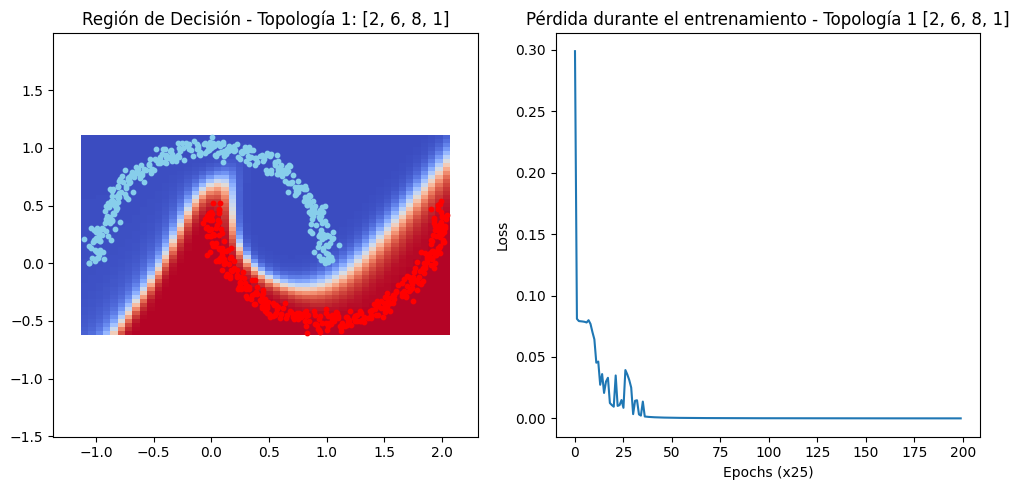

Tiempo de Ejecución Topología 1: 2.30 s


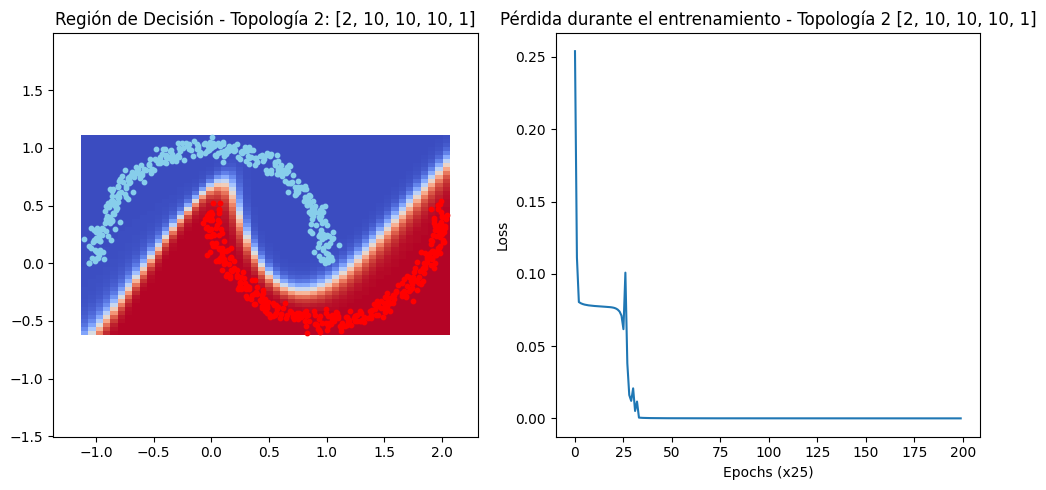

Tiempo de Ejecución Topología 2: 2.53 s


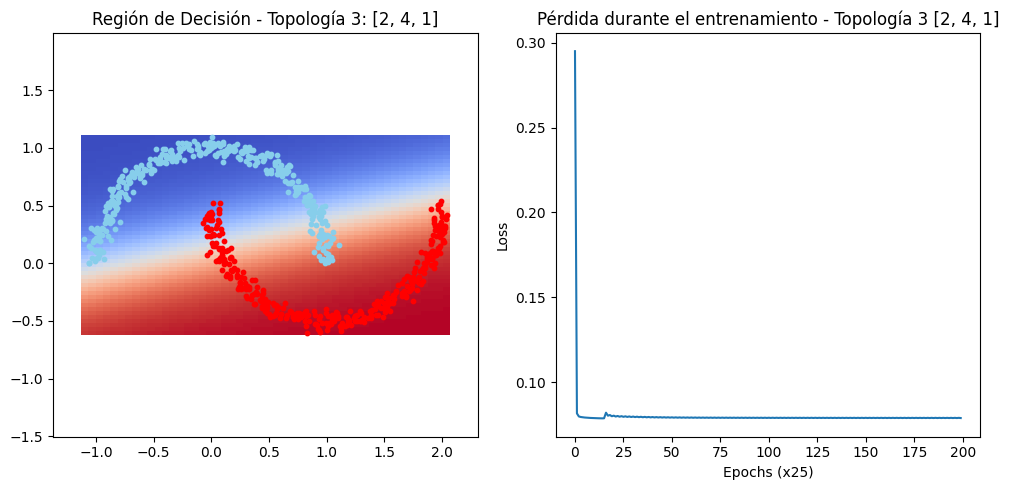

Tiempo de Ejecución Topología 3: 0.77 s


In [12]:
import time

from IPython.display import clear_output

topology_1 = [p, 6, 8, 1]
neural_net_1 = create_nn(topology_1, sigm)

# Better topology (more layers/neurons)
topology_2 = [p, 10, 10, 10, 1]
neural_net_2 = create_nn(topology_2, sigm)

# Worse topology (fewer layers/neurons)
topology_3 = [p, 4, 1]
neural_net_3 = create_nn(topology_3, sigm)

topologies = {
    "Topología 1": (topology_1, neural_net_1),
    "Topología 2": (topology_2, neural_net_2),
    "Topología 3": (topology_3, neural_net_3)
}

all_loss = {}
all_execution_time = {}
all_plots = {}

for name, (topology, neural_net) in topologies.items():
    loss = []
    start_time = time.time()

    for i in range(5000):
        pY = train(neural_net, X, Y, l2_cost, 0.05)
        if i % 25 == 0:
            loss.append(l2_cost[0](pY, Y))

    end_time = time.time()
    all_loss[name] = loss
    all_execution_time[name] = end_time - start_time

    # Prepare data for decision boundary plot
    rest = 50
    _x0 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), rest)
    _x1 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), rest)
    _Y = np.zeros((rest, rest))
    for i0, x0 in enumerate(_x0):
        for i1, x1 in enumerate(_x1):
            _Y[i0, i1] = train(neural_net, np.array([[x0, x1]]), Y, l2_cost, train=False)[0, 0]

    # Store plots instead of showing immediately
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].pcolormesh(_x0, _x1, _Y.T, cmap='coolwarm')
    axes[0].axis('equal')
    axes[0].scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='skyblue', s=10)
    axes[0].scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='red', s=10)
    axes[0].set_title(f'Región de Decisión - {name}: {topology}') # Added topology to title

    axes[1].plot(range(len(loss)), loss)
    axes[1].set_title(f'Pérdida durante el entrenamiento - {name} {topology}') # Added topology to title
    axes[1].set_xlabel("Epochs (x25)")
    axes[1].set_ylabel("Loss")

    plt.tight_layout()
    all_plots[name] = fig # Store the figure

# Display all stored plots at the end
clear_output(wait=True)

for name, fig in all_plots.items():
    display(fig)
    plt.close(fig) # Close the figure to free memory
    print(f"Tiempo de Ejecución {name}: {all_execution_time[name]:.2f} s")

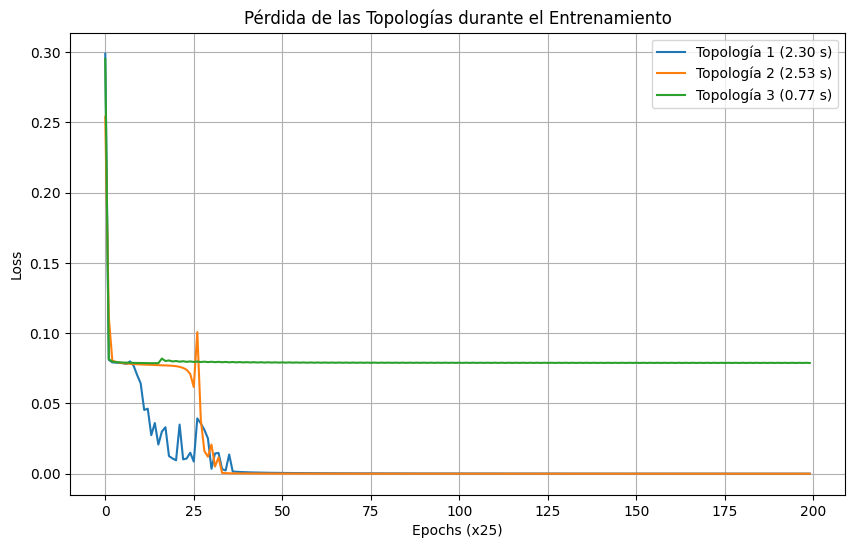

In [16]:
# Graficar la pérdida de cada Topología
plt.figure(figsize=(10, 6))
for name, loss_values in all_loss.items():
    plt.plot(range(len(loss_values)), loss_values, label=f'{name} ({all_execution_time[name]:.2f} s)')

plt.title('Pérdida de las Topologías durante el Entrenamiento')
plt.xlabel("Epochs (x25)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()